In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import pandas as pd


df = pd.read_csv("network.csv")
df.head()

,SourceName,TargetName,Weight
0,thegifted,mimichan,0.011472
1,mimichan,thegifted,0.011472
2,jacks,cathol,0.013384
3,cathol,jacks,0.013384
4,restrict,threaten,0.013384


In [41]:
for index, row in df.iterrows():
    print(row['SourceName'], row['TargetName'])
    break

thegifted mimichan


In [42]:

# Build the graph with Louvain algorithm
G = nx.DiGraph()
for index, row in df.iterrows():
    source = row['SourceName']
    print(source)
    target = row['TargetName']
    print(target)
    weight = row['Weight']
    print(weight)
    if weight > 0:
        G.add_edge(source, target, weight=weight)
        
"""
Al though the clusters a ppear separatel y, the co- occurrence points out 
the closeness of keywords and indicate that none of the clusters stands alone in the field.
"""

thegifted
mimichan
0.011472275334608002
mimichan
thegifted
0.011472275334608002
jacks
cathol
0.0133843212237094
cathol
jacks
0.0133843212237094
restrict
threaten
0.0133843212237094
threaten
restrict
0.0133843212237094
jacks,video
cathol
0.0133843212237094
cathol,video
jacks
0.0133843212237094
backlash,restrict
threaten
0.011472275334608002
backlash,threaten
restrict
0.011472275334608002
restrict,wechat
threaten
0.0133843212237094
threaten,wechat
restrict
0.0133843212237094
follow,restrict
threaten
0.011472275334608002
follow,threaten
restrict
0.011472275334608002
backlash,wechat
restrict
0.011472275334608002
follow,wechat
restrict
0.011472275334608002
backlash,wechat
threaten
0.011472275334608002
follow,wechat
threaten
0.011472275334608002
fancam,leak
chase
0.011472275334608002
leak,stream
chase
0.011472275334608002
leak,yoongi
chase
0.011472275334608002
drama,leak
chase
0.011472275334608002
leak,parti
chase
0.011472275334608002
edit,leak
chase
0.011472275334608002
kpop,leak
chase
0.01

'\nAl though the clusters a ppear separatel y, the co- occurrence points out \nthe closeness of keywords and indicate that none of the clusters stands alone in the field.\n'

In [43]:
# in our question, we don't care for the order of terms. Then, we could convert graph to undirected graph. 
G = G.to_undirected()

#first compute the best partition
partition = community.best_partition(G, weight = 'weight')

In [44]:
set(partition.values())
partition.keys()

dict_keys(['thegifted', 'mimichan', 'jacks', 'cathol', 'restrict', 'threaten', 'jacks,video', 'cathol,video', 'backlash,restrict', 'backlash,threaten', 'restrict,wechat', 'threaten,wechat', 'follow,restrict', 'follow,threaten', 'backlash,wechat', 'follow,wechat', 'fancam,leak', 'chase', 'leak,stream', 'leak,yoongi', 'drama,leak', 'leak,parti', 'edit,leak', 'kpop,leak'])

In [45]:
G

In [46]:
# Summary Keyword co-occurrence clusters
for com in set(partition.values()):
    print(com)
    list_nodes = [node for node in partition.keys() if partition[node] == com]
    print(list_nodes)
    print("\n")
    

0
['thegifted', 'mimichan']


1
['jacks', 'cathol', 'jacks,video', 'cathol,video']


2
['restrict', 'threaten', 'backlash,restrict', 'backlash,threaten', 'restrict,wechat', 'threaten,wechat', 'follow,restrict', 'follow,threaten', 'backlash,wechat', 'follow,wechat']


3
['fancam,leak', 'chase', 'leak,stream', 'leak,yoongi', 'drama,leak', 'leak,parti', 'edit,leak', 'kpop,leak']




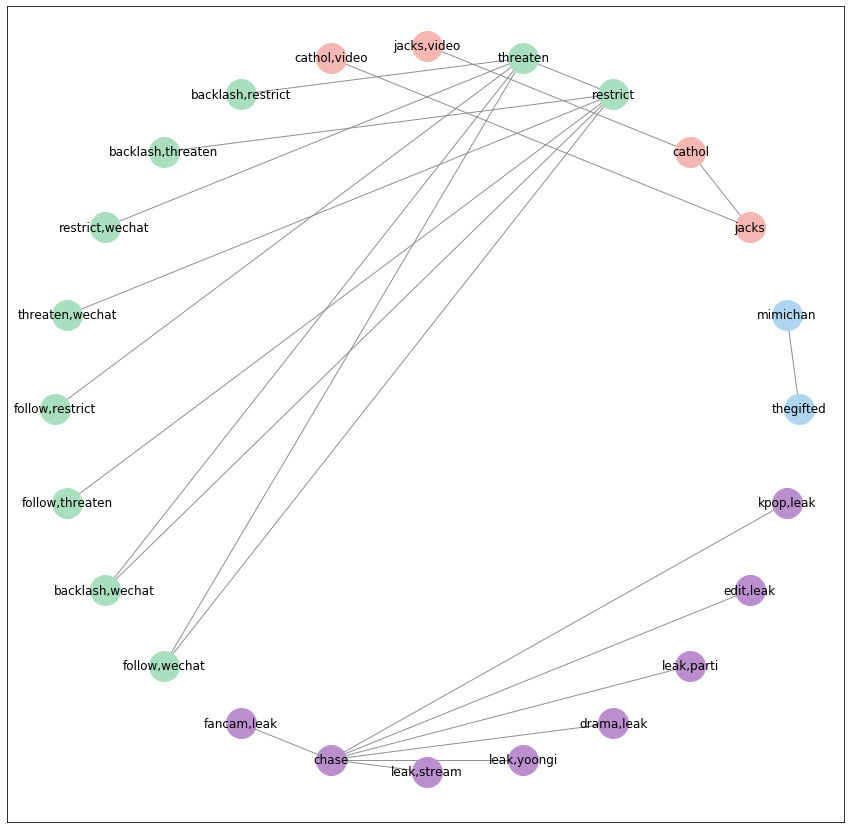

In [49]:
# Chord graph
plt.figure(figsize=(15,15))
position = nx.circular_layout(G)

nodeListA = [node for node in partition.keys() if partition[node] == 0]
nodeListB = [node for node in partition.keys() if partition[node] == 1]
nodeListC = [node for node in partition.keys() if partition[node] == 2]
nodeListD = [node for node in partition.keys() if partition[node] == 3]

nx.draw_networkx_nodes(G,position, nodelist=nodeListA, node_color="#AED6F1", node_size=900)
nx.draw_networkx_nodes(G,position, nodelist=nodeListB, node_color="#F5B7B1", node_size=900)
nx.draw_networkx_nodes(G,position, nodelist=nodeListC, node_color="#A9DFBF", node_size=900)
nx.draw_networkx_nodes(G,position, nodelist=nodeListD, node_color="#BB8FCE", node_size=900)

nx.draw_networkx_edges(G,position, edge_color='#909090')
nx.draw_networkx_labels(G,position)

plt.show()